In [17]:
import matplotlib.pyplot as plt
import librosa
import os
import numpy as np

## Jumlah sampel asma vs sehat

In [27]:
path_asthma = "./dataset/Tawfik_dkk/asthma"
path_healthy = "./dataset/Tawfik_dkk/healthy"

asthma_files = [f for f in os.listdir(path_asthma) if f.endswith(".wav")]
healthy_files = [f for f in os.listdir(path_healthy) if f.endswith(".wav")]

print(f"Asthma files: {len(asthma_files)}")
print(f"Healthy files: {len(healthy_files)}")

Asthma files: 288
Healthy files: 133


yang asma doublenya healthy

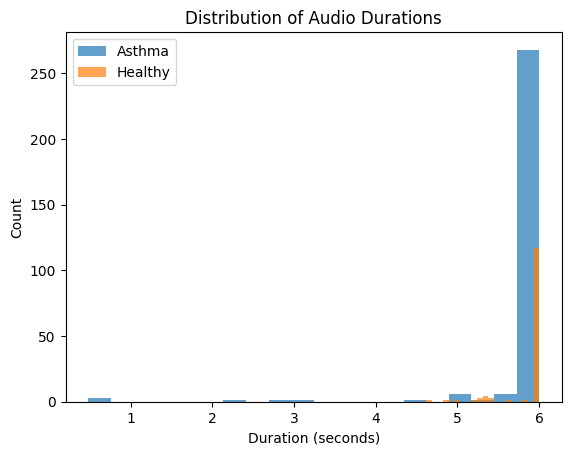

In [28]:
durations = {"asthma": [], "healthy": []}

for file in asthma_files:
    y, sr = librosa.load(os.path.join(path_asthma, file), sr=None)
    durations["asthma"].append(len(y)/sr)

for file in healthy_files:
    y, sr = librosa.load(os.path.join(path_healthy, file), sr=None)
    durations["healthy"].append(len(y)/sr)

plt.hist(durations["asthma"], bins=20, alpha=0.7, label="Asthma")
plt.hist(durations["healthy"], bins=20, alpha=0.7, label="Healthy")
plt.xlabel("Duration (seconds)")
plt.ylabel("Count")
plt.legend()
plt.title("Distribution of Audio Durations")
plt.show()

awokawok beda banget asma dengan sehat

## Perbandingan waveform

In [29]:
import random

In [54]:
# pick random examples (make sure asthma_files/healthy_files exist)
example_asthma = random.choice(asthma_files)
example_healthy = random.choice(healthy_files)

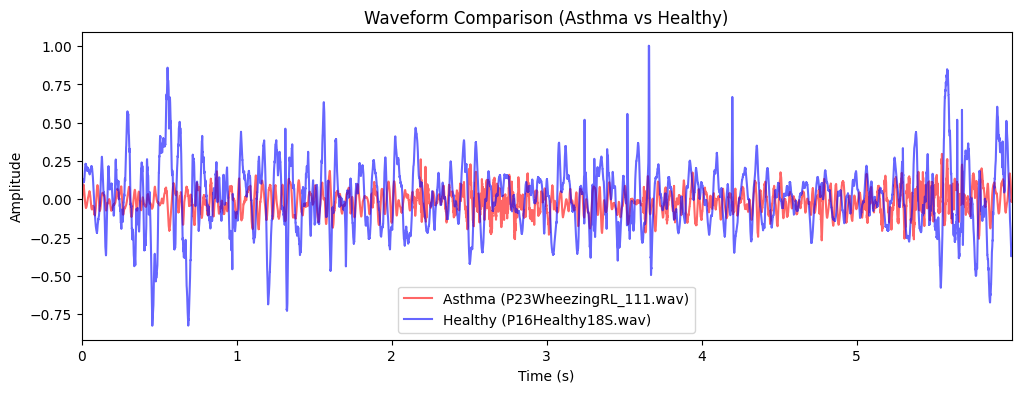

In [ ]:
# load both with the same sampling rate (resample if needed)
y_asma, sr = librosa.load(os.path.join(path_asthma, example_asthma), sr=16000)
y_healthy, sr = librosa.load(os.path.join(path_healthy, example_healthy), sr=16000)

# OPTION A — plot full signals (different durations OK)
t_asma = np.arange(len(y_asma)) / sr       # time in seconds
t_healthy = np.arange(len(y_healthy)) / sr

plt.figure(figsize=(12, 4))
plt.plot(t_asma, y_asma, label=f"Asthma ({example_asthma})", color="red", alpha=0.6)
plt.plot(t_healthy, y_healthy, label=f"Healthy ({example_healthy})", color="blue", alpha=0.6)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Waveform Comparison (Asthma vs Healthy)")
plt.legend()
plt.xlim(0, max(t_asma[-1], t_healthy[-1]))   # same x-scale for both
plt.show()

## Perbandingan spectogram

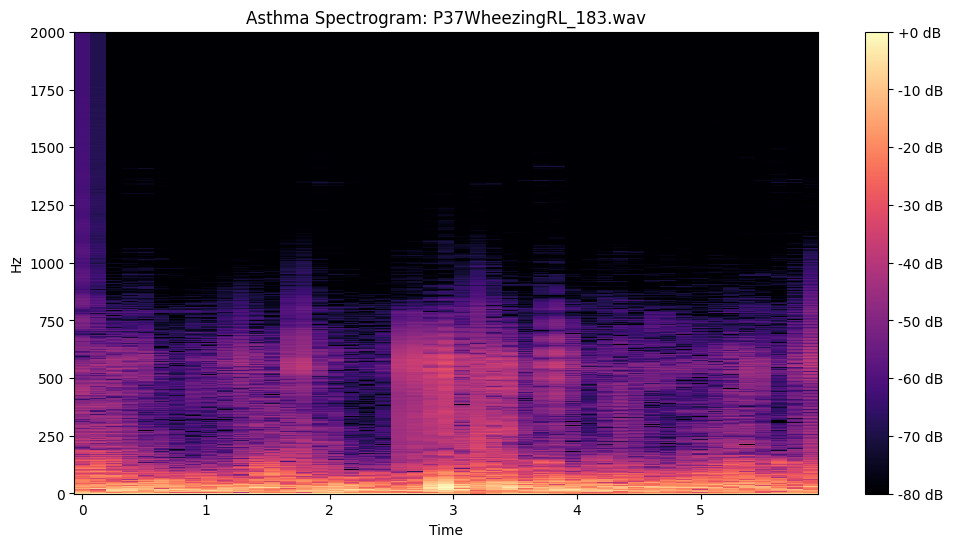

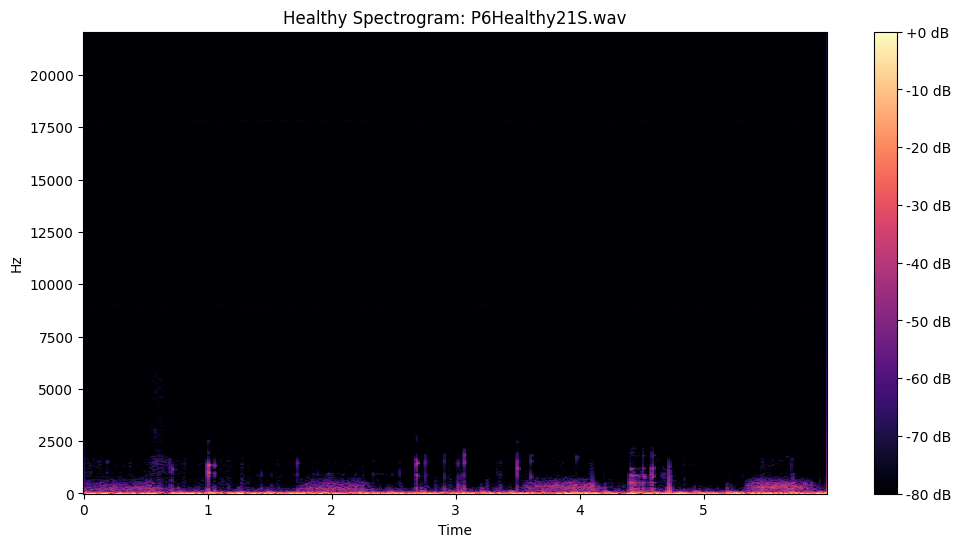

In [58]:
# pick random examples (make sure asthma_files/healthy_files exist)
example_asthma = random.choice(asthma_files)
example_healthy = random.choice(healthy_files)

y_asma, sr_asma = librosa.load(os.path.join(path_asthma, example_asthma), sr=None)
y_healthy, sr_healthy = librosa.load(os.path.join(path_healthy, example_healthy), sr=None)

# Asthma spectrogram
D_asma = librosa.stft(y_asma)
S_asma = librosa.amplitude_to_db(np.abs(D_asma), ref=np.max)

plt.figure(figsize=(12, 6))
librosa.display.specshow(S_asma, sr=sr_asma, x_axis="time", y_axis="hz", cmap="magma")
plt.colorbar(format="%+2.0f dB")
plt.title(f"Asthma Spectrogram: {example_asthma}")
plt.show()

# Healthy spectrogram
D_healthy = librosa.stft(y_healthy)
S_healthy = librosa.amplitude_to_db(np.abs(D_healthy), ref=np.max)

plt.figure(figsize=(12, 6))
librosa.display.specshow(S_healthy, sr=sr_healthy, x_axis="time", y_axis="hz", cmap="magma")
plt.colorbar(format="%+2.0f dB")
plt.title(f"Healthy Spectrogram: {example_healthy}")
plt.show()

## MEL Spectrogram and MFCC

c:\Users\User\Documents\Codes\Python\DS\Satdat_SEC\asthma-detection\venv\lib\site-packages\librosa\feature\spectral.py:2148: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  mel_basis = filters.mel(sr=sr, n_fft=n_fft, **kwargs)


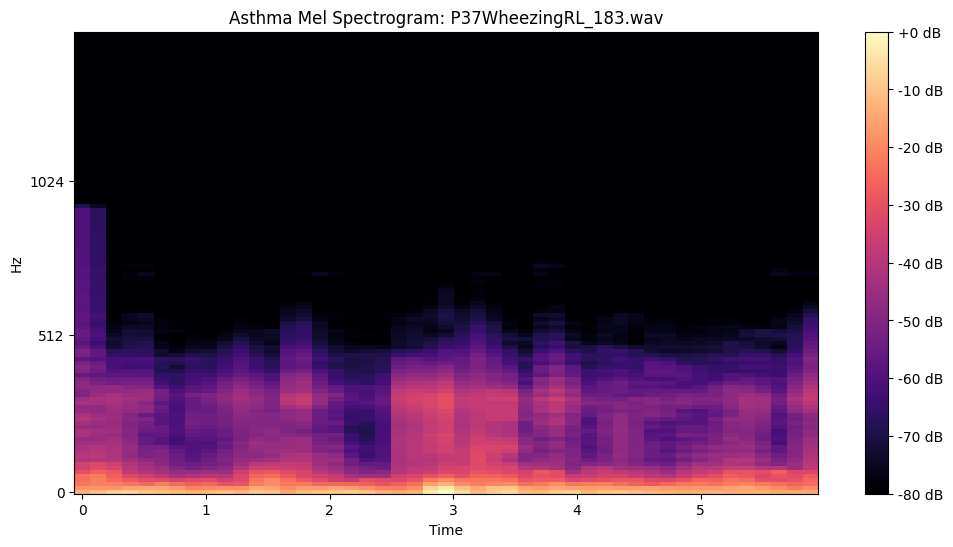

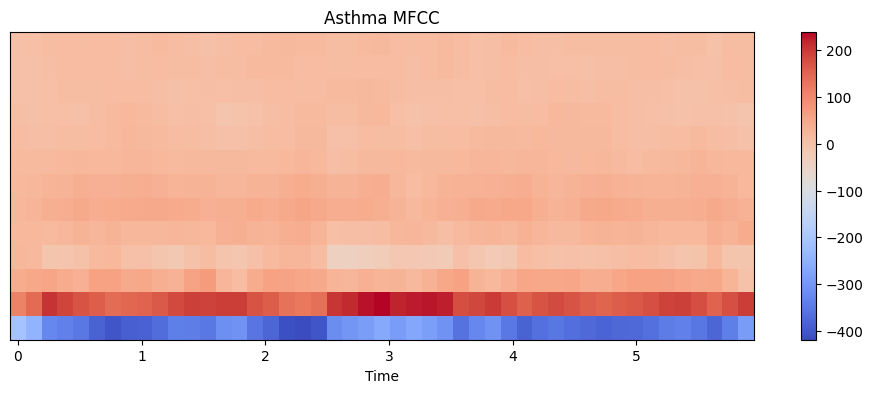

In [59]:
# Mel spectrogram
mel_asma = librosa.feature.melspectrogram(y=y_asma, sr=sr_asma, n_mels=128, fmax=8000)
mel_asma_db = librosa.power_to_db(mel_asma, ref=np.max)

plt.figure(figsize=(12, 6))
librosa.display.specshow(mel_asma_db, sr=sr_asma, x_axis="time", y_axis="mel", cmap="magma")
plt.colorbar(format="%+2.0f dB")
plt.title(f"Asthma Mel Spectrogram: {example_asthma}")
plt.show()

# MFCCs
mfcc_asma = librosa.feature.mfcc(y=y_asma, sr=sr_asma, n_mfcc=13)
plt.figure(figsize=(12, 4))
librosa.display.specshow(mfcc_asma, x_axis="time", sr=sr_asma)
plt.colorbar()
plt.title("Asthma MFCC")
plt.show()

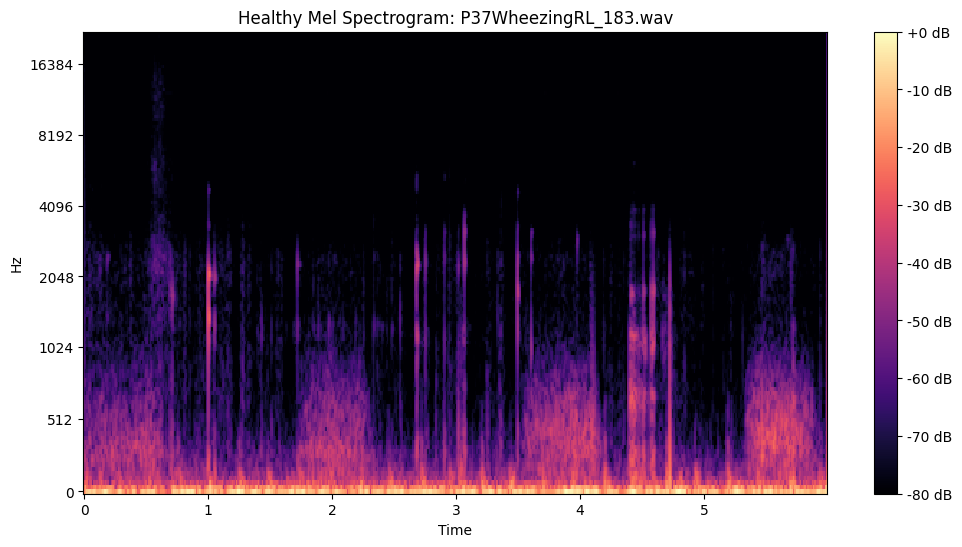

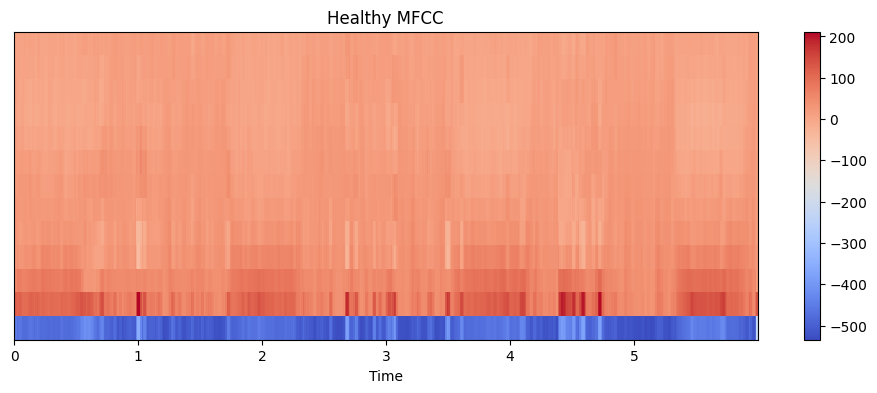

In [61]:
# Mel spectrogram
mel_healthy = librosa.feature.melspectrogram(y=y_healthy, sr=sr_healthy, n_mels=128, fmax=8000)
mel_asma_db = librosa.power_to_db(mel_healthy, ref=np.max)

plt.figure(figsize=(12, 6))
librosa.display.specshow(mel_asma_db, sr=sr_healthy, x_axis="time", y_axis="mel", cmap="magma")
plt.colorbar(format="%+2.0f dB")
plt.title(f"Healthy Mel Spectrogram: {example_asthma}")
plt.show()

# MFCCs
mfcc_asma = librosa.feature.mfcc(y=y_healthy, sr=sr_healthy, n_mfcc=13)
plt.figure(figsize=(12, 4))
librosa.display.specshow(mfcc_asma, x_axis="time", sr=sr_healthy)
plt.colorbar()
plt.title("Healthy MFCC")
plt.show()

## Feature Comparison

In [64]:
import pandas as pd
import seaborn as sns

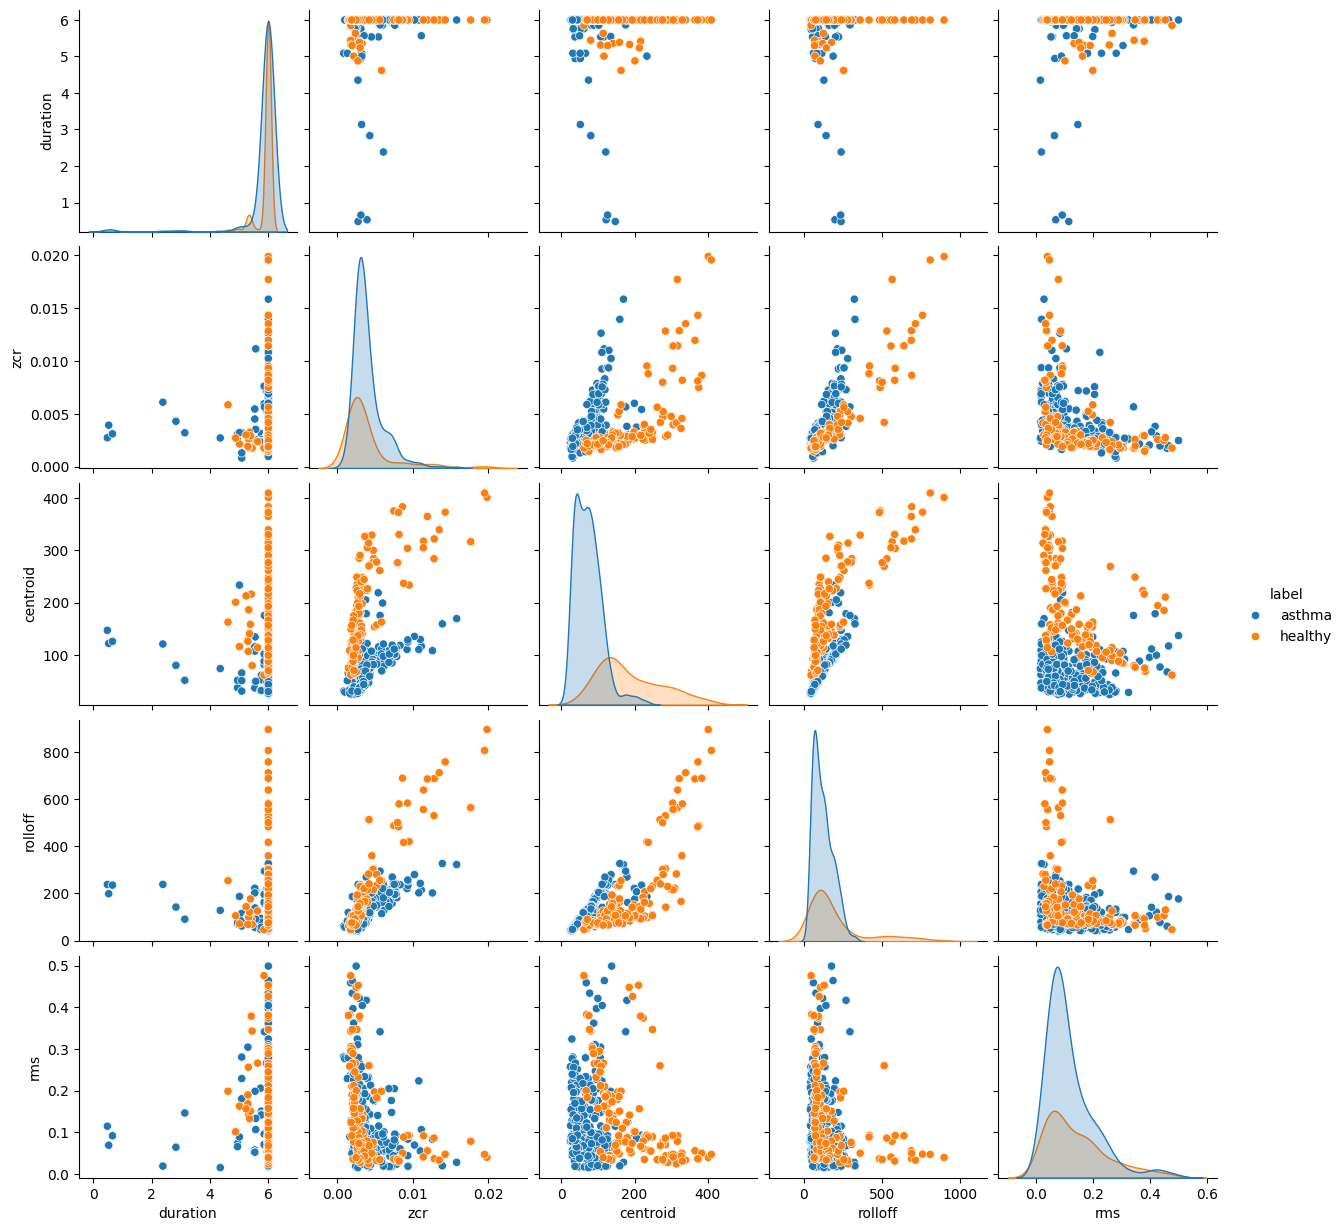

In [65]:
def extract_features(y, sr):
    features = {
        "duration": len(y)/sr,
        "zcr": librosa.feature.zero_crossing_rate(y)[0].mean(),
        "centroid": librosa.feature.spectral_centroid(y=y, sr=sr)[0].mean(),
        "rolloff": librosa.feature.spectral_rolloff(y=y, sr=sr)[0].mean(),
        "rms": librosa.feature.rms(y=y)[0].mean(),
    }
    return features

data = []

for file in asthma_files:
    y, sr = librosa.load(os.path.join(path_asthma, file), sr=16000)
    f = extract_features(y, sr)
    f["label"] = "asthma"
    f["file"] = file
    data.append(f)

for file in healthy_files:
    y, sr = librosa.load(os.path.join(path_healthy, file), sr=16000)
    f = extract_features(y, sr)
    f["label"] = "healthy"
    f["file"] = file
    data.append(f)

df = pd.DataFrame(data)

sns.pairplot(df, hue="label", vars=["duration", "zcr", "centroid", "rolloff", "rms"])
plt.show()

Fitur yang bisa membedakan:
- zcr (zero crossing rate): How often the signal changes sign (+ to – or – to +). High ZCR → more noisy / harsh sounds (like wheezing). Low ZCR → smoother sounds.
- spectral centroid: Represents the "center of mass" of the spectrum. Healthy: more concentrated at lower centroid values. Asthma: spreads higher → more “bright/harsh” spectral energy.
- spectral roloff: Represents the "center of mass" of the spectrumThe frequency below which a certain % (often 85%) of total spectral energy lies.Tells you how much high-frequency content is present.